In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Data
train = pd.read_csv(r'.\train.csv')
test = pd.read_csv(r'.\test.csv')
# Concatenate train & test
train_objs_num = len(train)
y = train['Survived']
dataset = pd.concat(objs=[train.drop(columns=['Survived']), test], axis=0)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000


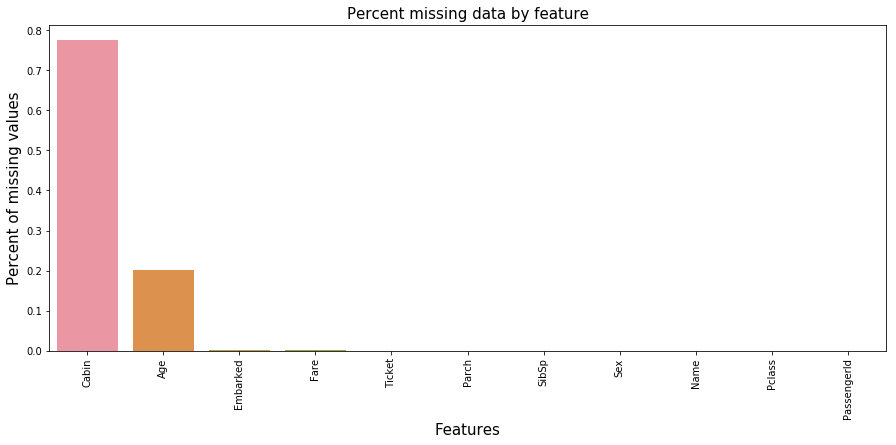

In [5]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

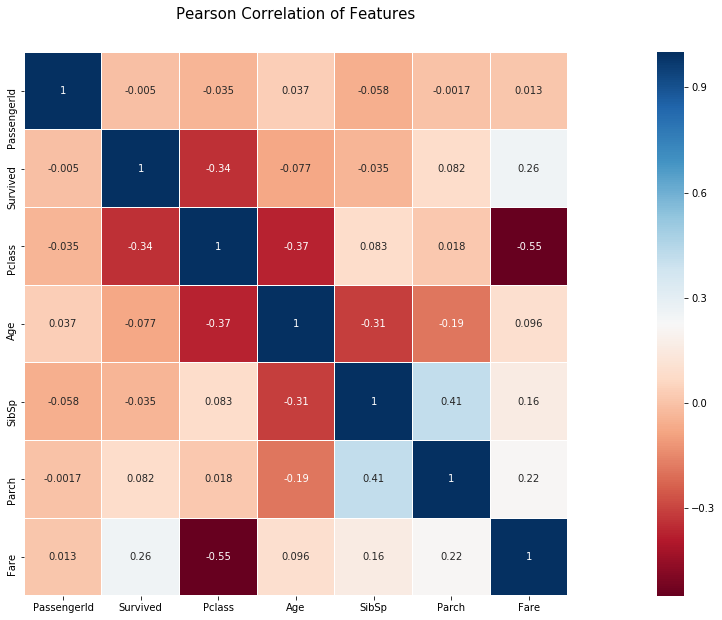

In [6]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

In [7]:
X_incomplete = dataset.drop(columns=['Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'])
X_incomplete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1308 non-null float64
dtypes: float64(2), int64(4)
memory usage: 71.6 KB


#### using fancyimpute package

In [8]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler, MICE

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 3 nearest rows which have a feature to fill in each row's missing features
#X_filled_knn = KNN(k=3).fit_transform(X_incomplete)

# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
#X_filled_nnm = NuclearNormMinimization().fit_transform(X_incomplete)

# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
X_incomplete_normalized = BiScaler().fit_transform(X_incomplete)
X_filled_softimpute = SoftImpute().fit_transform(X_incomplete_normalized)

Using TensorFlow backend.


ImportError: cannot import name 'MICE' from 'fancyimpute' (c:\users\smrut\appdata\local\programs\python\python37\lib\site-packages\fancyimpute\__init__.py)

In [9]:
knn_mse = ((X_filled_knn[missing_mask] - X[missing_mask]) ** 2).mean()
print("knnImpute MSE: %f" % knn_mse)

NameError: name 'X_filled_knn' is not defined

#### using scikit learn

In [10]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [11]:
IterativeImputer(max_iter=10, random_state=0).fit_transform(X_incomplete)

array([[1.00000000e+00, 3.00000000e+00, 2.20000000e+01, 1.00000000e+00,
        0.00000000e+00, 7.25000000e+00],
       [2.00000000e+00, 1.00000000e+00, 3.80000000e+01, 1.00000000e+00,
        0.00000000e+00, 7.12833000e+01],
       [3.00000000e+00, 3.00000000e+00, 2.60000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.92500000e+00],
       ...,
       [1.30700000e+03, 3.00000000e+00, 3.85000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.25000000e+00],
       [1.30800000e+03, 3.00000000e+00, 2.64491351e+01, 0.00000000e+00,
        0.00000000e+00, 8.05000000e+00],
       [1.30900000e+03, 3.00000000e+00, 2.21542675e+01, 1.00000000e+00,
        1.00000000e+00, 2.23583000e+01]])

#### mice from impyute package

In [12]:
from impyute.imputation.cs import mice

In [14]:
op = mice(X_incomplete)

c:\users\smrut\appdata\local\programs\python\python37\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
